[Back to course overview](../CourseOverviewR.ipynb)

# Access PostgreSQL Database

## Create, write to and query PostgreSQL DB
* Author: Johannes Maucher
* Last Update: 2017-05-04
* References:
    * Blog Getting Started with RPostgreSQL: [https://www.r-bloggers.com/getting-started-with-postgresql-in-r/](https://www.r-bloggers.com/getting-started-with-postgresql-in-r/).
    * RPostgreSQL Reference Guide: [https://cran.r-project.org/web/packages/RMySQL/RMySQL.pdf](https://cran.r-project.org/web/packages/RMySQL/RMySQL.pdf) 
    * PostgreSQL Online Manual: [https://www.postgresql.org/docs/8.4/static/queries-table-expressions.html](https://www.postgresql.org/docs/8.4/static/queries-table-expressions.html).
* Topics of this notebook
    * Connect to PostgreSQL DB
    * Write dataframe to data from PostgreSQL Database
    * Query data from PostgreSQL Database
    * Boxplot visualization of statistics of mtcar dataset

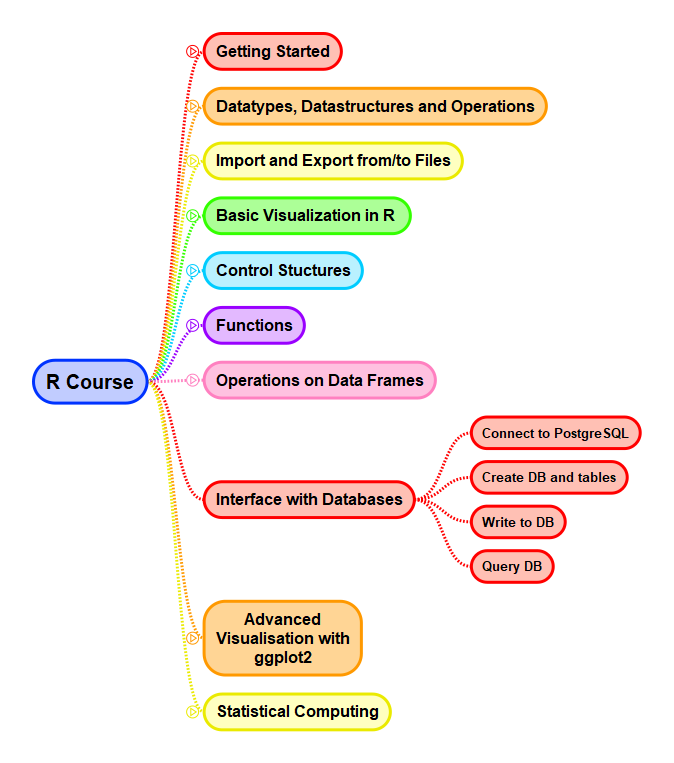

In [1]:
library("IRdisplay")
display_png(file="../../../Pics/DSRdatabase.PNG",width=900)    

## Prelimnary Work

### Create PostgreSQL DB for experiments by copying spikee Development DB

1. In pgAdmin III create a new database and a new table as described in [https://www.r-bloggers.com/getting-started-with-postgresql-in-r/](https://www.r-bloggers.com/getting-started-with-postgresql-in-r/).


In the code below, we assume that the new database has
* name: dataScienceExp
* user: postgres
* pw: hrvanalyzer

## Connect do Database and verify existence of table

In [2]:
#getCRANmirrors(all = FALSE, local.only = FALSE)
options(repos=structure(c(CRAN="http://cloud.r-project.org/")))
#install.packages("RMySQL")

In [3]:
library(RPostgreSQL)

Loading required package: DBI


In [4]:
pw<-{
    "hrvanalyzer"
}
drv<-dbDriver("PostgreSQL")
con <- dbConnect(drv,dbname="dataScienceExp",host="localhost",port=5432,user="postgres",password=pw)
rm(pw)

In [5]:
print(dbExistsTable(con,"cartable"))

[1] TRUE


## Write dataframe to Database

In [6]:
data(mtcars)
df <- data.frame(carname = rownames(mtcars), 
                 mtcars, 
                 row.names = NULL)
df$carname <- as.character(df$carname)
rm(mtcars)
dim(df)
head(df)

[1] 32 12

carname,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [11]:
dbWriteTable(con, "cartable", value = df, overwrite = FALSE, append = TRUE, row.names = FALSE)

ERROR: Error in postgresqlgetResult(new.con): RS-DBI driver: (could not Retrieve the result : FEHLER:  doppelter SchlÃ¼sselwert verletzt Unique-Constraint â€žcarnameâ€œ
DETAIL:  SchlÃ¼ssel â€ž(carname)=(Mazda RX4)â€œ existiert bereits.
CONTEXT:  COPY cartable, Zeile 1
)


## Query Database

In [12]:
df_postgres <- dbGetQuery(con, "SELECT * from cartable")
head(df_postgres)
identical(df, df_postgres)

carname,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


[1] TRUE

In [13]:
df_cyl6 <- dbGetQuery(con, "SELECT * from cartable WHERE cyl=6 ORDER BY mpg")
head(df_cyl6)

carname,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4


## Visualize Boxplot statistics for MPG per Cylinder Count

Loading required package: ggplot2


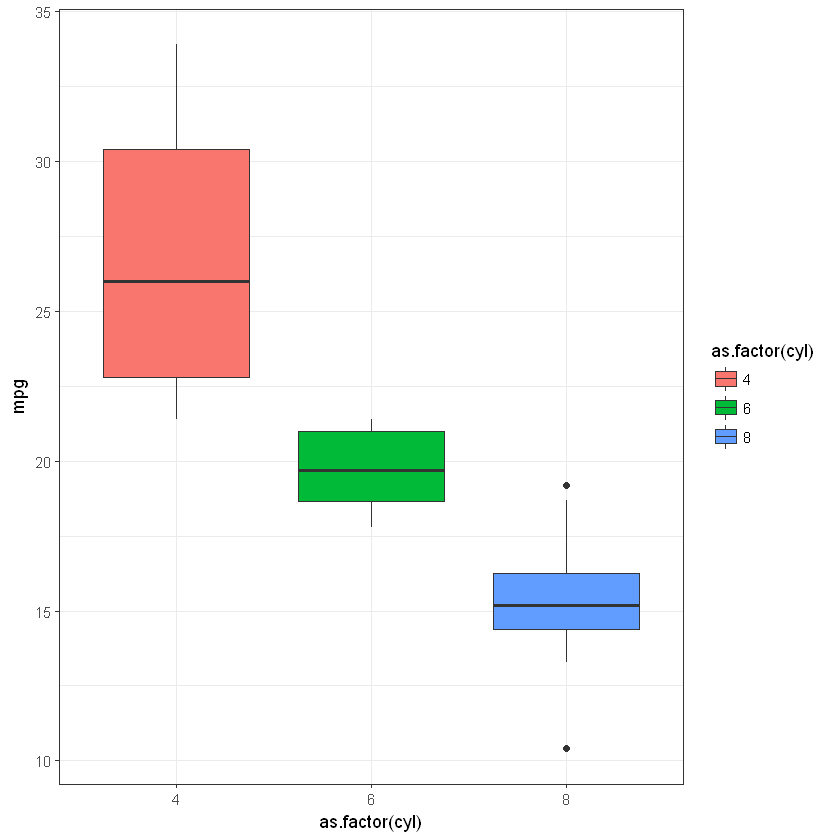

In [14]:
require(ggplot2)
ggplot(df_postgres, aes(x = as.factor(cyl), y = mpg, fill = as.factor(cyl))) + 
geom_boxplot() + theme_bw()

In [15]:
dbDisconnect(con)

[1] TRUE